In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('C:\\Users\\DEEL\\Downloads\\employeePerformance.csv')

In [4]:
df.head()

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


In [5]:
df.shape

(100000, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

In [7]:
df['Gender'].value_counts()

Gender
Male      48031
Female    48001
Other      3968
Name: count, dtype: int64

In [8]:
df.head(5)

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


In [9]:
df['Department'].value_counts()

Department
Marketing           11216
Finance             11200
Operations          11181
IT                  11131
Sales               11122
Legal               11118
Customer Support    11116
HR                  10960
Engineering         10956
Name: count, dtype: int64

<Axes: xlabel='Department'>

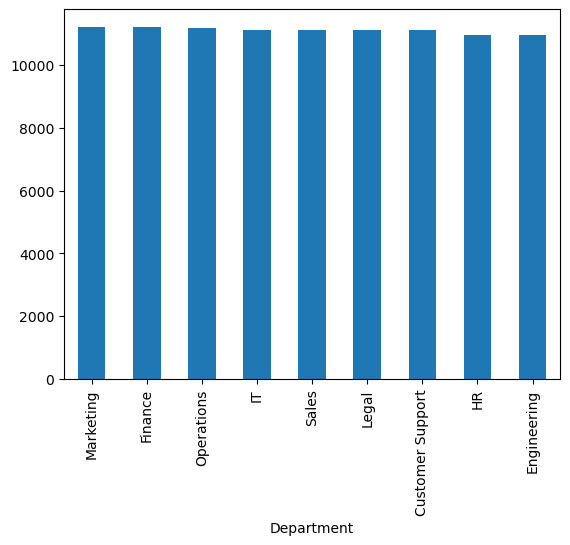

In [10]:
df['Department'].value_counts().plot(kind = 'bar')

<Axes: ylabel='count'>

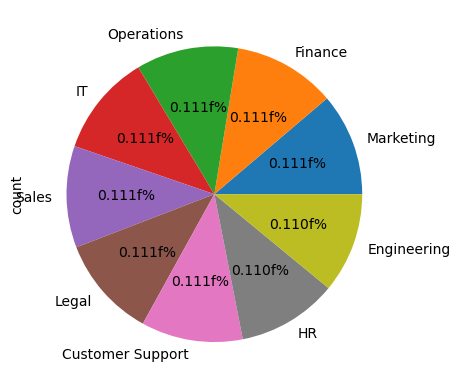

In [11]:
df['Department'].value_counts().head(10).plot(kind = 'pie' , autopct = '0.1%if%%' )

In [12]:
df['Department'].describe()

count        100000
unique            9
top       Marketing
freq          11216
Name: Department, dtype: object

In [13]:
df['Department'].isnull().sum()

0

In [14]:
df['Department'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Department
Non-Null Count   Dtype 
--------------   ----- 
100000 non-null  object
dtypes: object(1)
memory usage: 781.4+ KB


In [15]:
df['Age'].isnull().sum()

0

In [16]:
df['Age'].skew()

-0.006169658520242082

<Axes: ylabel='count'>

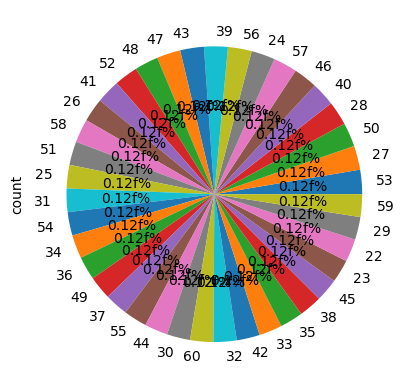

In [17]:
df['Age'].value_counts().plot(kind = 'pie' , autopct = '0.1%if%%' )

<Axes: xlabel='Age'>

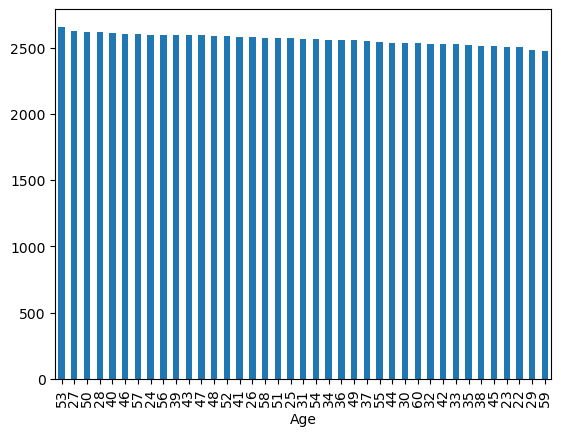

In [18]:
df['Age'].value_counts().plot(kind = 'bar')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


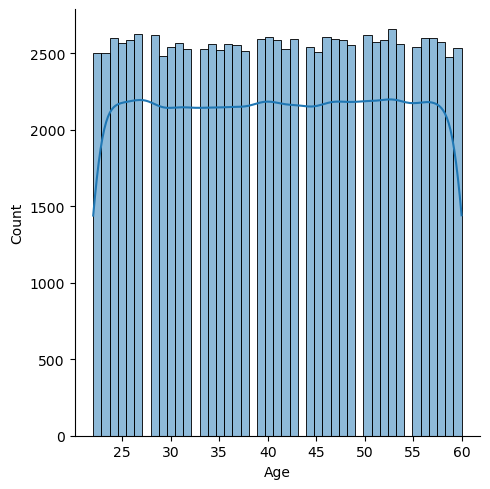

In [19]:
sns.displot(kind='hist', data = df , x = 'Age' , kde = True)

In [20]:
df['Age'].describe()

count    100000.000000
mean         41.029410
std          11.244121
min          22.000000
25%          31.000000
50%          41.000000
75%          51.000000
max          60.000000
Name: Age, dtype: float64

In [21]:
df['Age'].skew()

-0.006169658520242082

<Axes: >

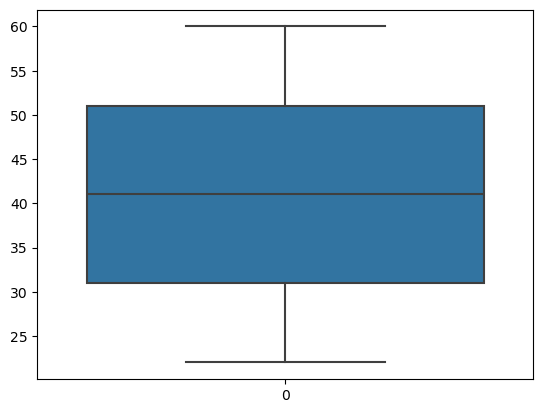

In [22]:
sns.boxplot(df['Age'])

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


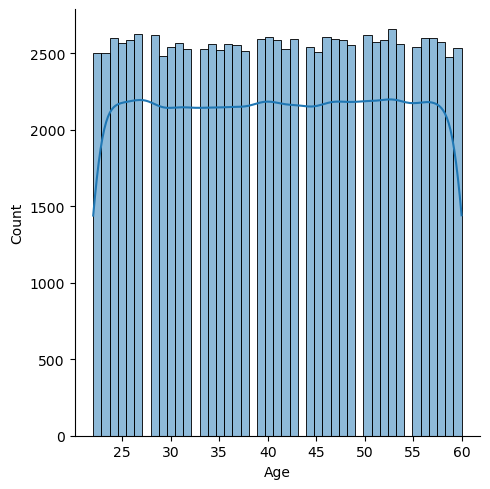

In [23]:
sns.displot(kind='hist', data = df , x = 'Age' , kde = True)

In [24]:
df.sample(5)

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
64778,64779,Sales,Male,53,Consultant,2024-07-11 08:03:05.556036,0,Bachelor,1,6050.0,53,46,10,12,100,2,27,2,3.75,False
83644,83645,Operations,Male,35,Specialist,2023-08-02 08:03:05.556036,1,Bachelor,2,5400.0,60,47,24,11,100,10,59,2,2.33,False
69360,69361,Legal,Male,31,Developer,2024-05-03 08:03:05.556036,0,Master,3,6500.0,54,35,24,13,50,9,76,1,4.18,False
16504,16505,Customer Support,Male,23,Analyst,2021-11-18 08:03:05.556036,2,Bachelor,5,6000.0,32,6,18,10,25,6,24,0,3.69,False
41258,41259,Sales,Male,56,Manager,2020-07-15 08:03:05.556036,4,Bachelor,4,8400.0,46,10,23,10,25,1,93,2,3.80,False


In [25]:
df['Years_At_Company'].isnull().sum()

0

In [26]:
df['Years_At_Company'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Years_At_Company
Non-Null Count   Dtype
--------------   -----
100000 non-null  int64
dtypes: int64(1)
memory usage: 781.4 KB


In [27]:
df['Years_At_Company'].describe()

count    100000.000000
mean          4.476070
std           2.869336
min           0.000000
25%           2.000000
50%           4.000000
75%           7.000000
max          10.000000
Name: Years_At_Company, dtype: float64

<Axes: >

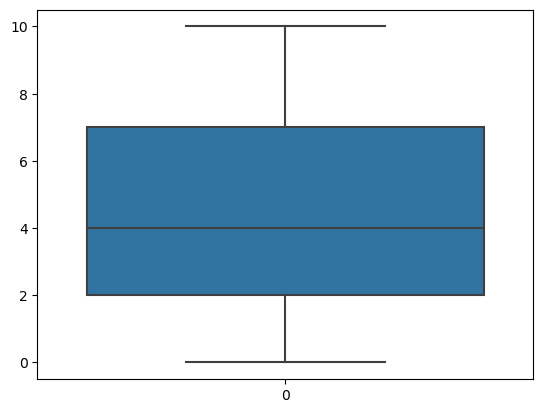

In [28]:
sns.boxplot(df['Years_At_Company'])

In [29]:
df['Monthly_Salary'].isnull().sum()

0

In [30]:
df['Monthly_Salary'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Monthly_Salary
Non-Null Count   Dtype  
--------------   -----  
100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB


In [31]:
df['Monthly_Salary'].describe()

count    100000.000000
mean       6403.211000
std        1372.508717
min        3850.000000
25%        5250.000000
50%        6500.000000
75%        7500.000000
max        9000.000000
Name: Monthly_Salary, dtype: float64

<Axes: xlabel='Monthly_Salary'>

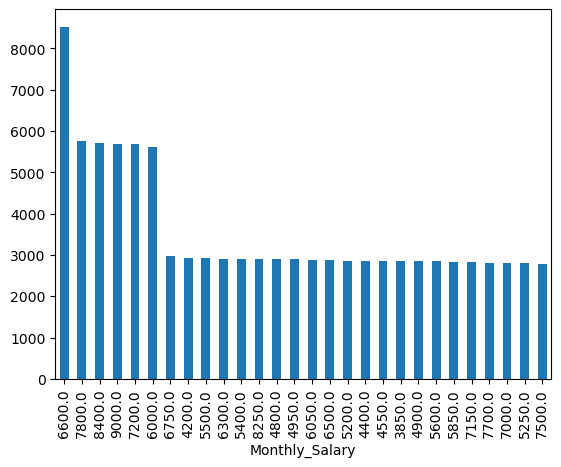

In [32]:
df['Monthly_Salary'].value_counts().plot(kind = 'bar')

<Axes: >

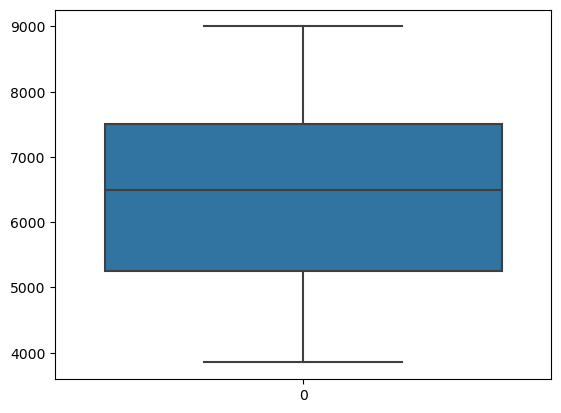

In [33]:
sns.boxplot(df['Monthly_Salary'])

In [34]:
df['Monthly_Salary'].value_counts()

Monthly_Salary
6600.0    8520
7800.0    5759
8400.0    5715
9000.0    5673
7200.0    5673
6000.0    5622
6750.0    2974
4200.0    2927
5500.0    2915
6300.0    2909
5400.0    2907
8250.0    2901
4800.0    2891
4950.0    2889
6050.0    2881
6500.0    2877
5200.0    2859
4400.0    2858
4550.0    2858
3850.0    2855
4900.0    2851
5600.0    2848
5850.0    2828
7150.0    2818
7700.0    2812
7000.0    2805
5250.0    2794
7500.0    2781
Name: count, dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


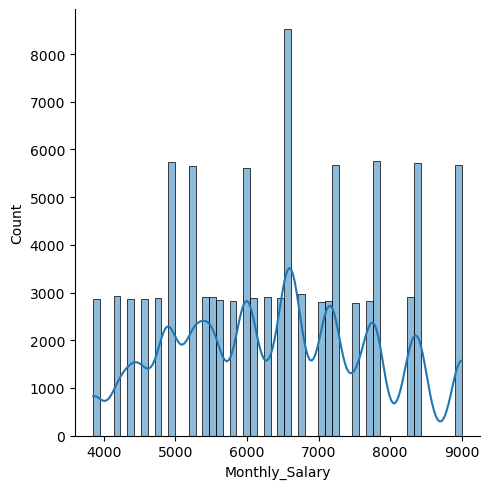

In [35]:
sns.displot(kind='hist', data = df , x = 'Monthly_Salary' , kde = True)

In [36]:
df['Monthly_Salary'].skew()

0.1012908017990116

In [37]:
df['Work_Hours_Per_Week'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Work_Hours_Per_Week
Non-Null Count   Dtype
--------------   -----
100000 non-null  int64
dtypes: int64(1)
memory usage: 781.4 KB


In [38]:
df['Work_Hours_Per_Week'].skew()

0.009621030975014756

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


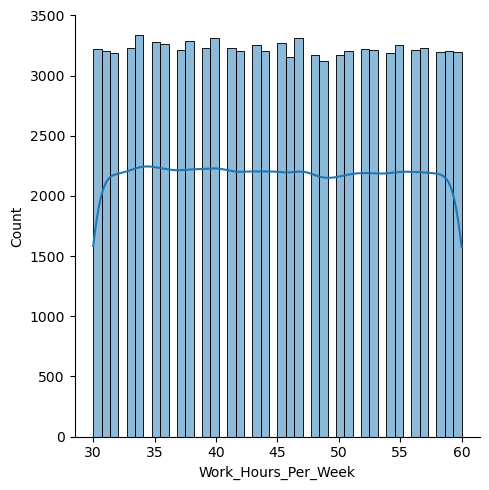

In [39]:
sns.displot(kind='hist', data = df , x = 'Work_Hours_Per_Week' , kde = True)

<Axes: >

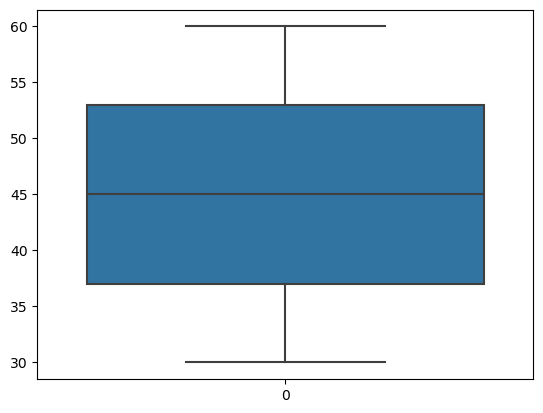

In [40]:
sns.boxplot(df['Work_Hours_Per_Week'])

In [41]:
df['Work_Hours_Per_Week'].value_counts()

Work_Hours_Per_Week
34    3335
40    3317
47    3310
38    3291
35    3281
45    3271
36    3265
43    3258
55    3254
33    3232
57    3232
41    3228
39    3228
52    3222
30    3221
56    3216
37    3212
53    3211
59    3209
51    3209
31    3207
44    3206
42    3206
60    3199
58    3197
32    3187
54    3185
48    3168
50    3168
46    3152
49    3123
Name: count, dtype: int64

<Axes: xlabel='Work_Hours_Per_Week'>

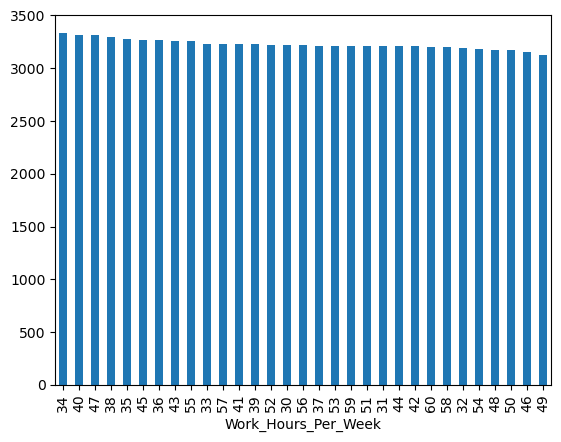

In [42]:
df['Work_Hours_Per_Week'].value_counts().plot(kind = 'bar')

In [43]:
df.sample(5)

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
91354,91355,Legal,Male,35,Developer,2018-04-14 08:03:05.556036,6,Bachelor,2,6000.0,60,39,4,2,25,19,3,2,1.12,False
43419,43420,Customer Support,Female,43,Specialist,2018-12-19 08:03:05.556036,5,High School,1,4950.0,56,13,18,1,100,13,71,0,2.98,False
84621,84622,Marketing,Male,34,Technician,2019-09-27 08:03:05.556036,4,High School,3,4550.0,50,22,17,6,50,18,65,2,4.35,False
22962,22963,Finance,Female,58,Consultant,2017-01-06 08:03:05.556036,7,Master,2,6600.0,40,36,4,12,0,19,67,2,1.01,False
28194,28195,Marketing,Female,51,Engineer,2017-10-01 08:03:05.556036,6,High School,4,8400.0,55,3,19,0,50,14,81,2,1.40,False


In [44]:
df['Projects_Handled'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Projects_Handled
Non-Null Count   Dtype
--------------   -----
100000 non-null  int64
dtypes: int64(1)
memory usage: 781.4 KB


In [45]:
df['Projects_Handled'].describe()

count    100000.000000
mean         24.431170
std          14.469584
min           0.000000
25%          12.000000
50%          24.000000
75%          37.000000
max          49.000000
Name: Projects_Handled, dtype: float64

<Axes: >

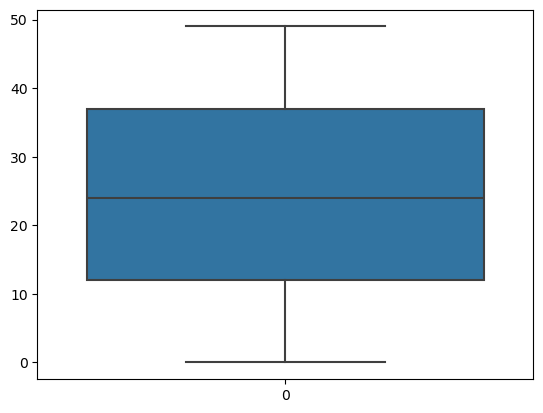

In [46]:
sns.boxplot(df['Projects_Handled'])

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


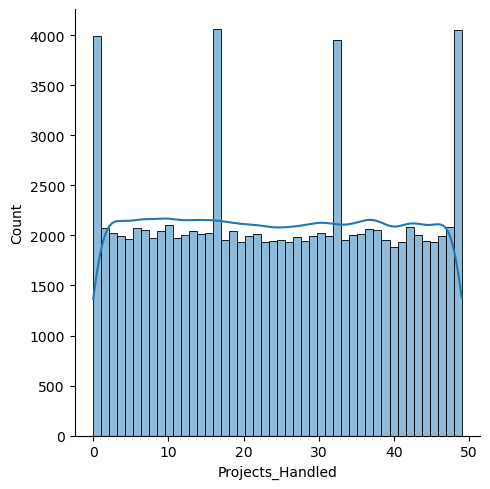

In [47]:
sns.displot(kind='hist', data = df , x = 'Projects_Handled' , kde = True)

In [48]:
df['Projects_Handled'].skew()

0.009682007877170098

<Axes: xlabel='Projects_Handled'>

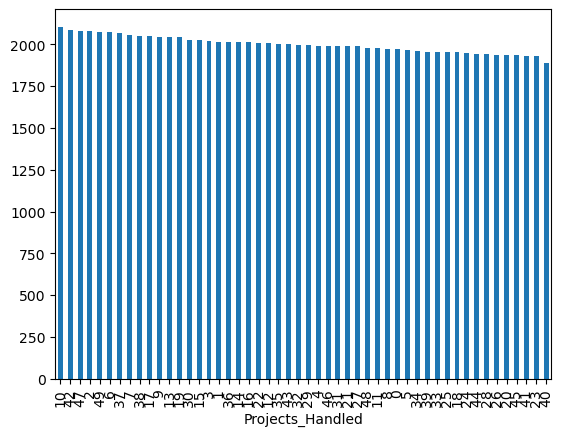

In [49]:
df['Projects_Handled'].value_counts().plot(kind = 'bar')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


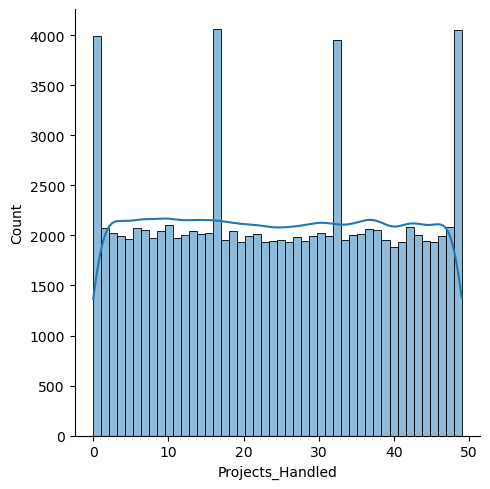

In [50]:
sns.displot(kind='hist', data = df , x = 'Projects_Handled' , kde = True)

In [51]:
df['Overtime_Hours'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Overtime_Hours
Non-Null Count   Dtype
--------------   -----
100000 non-null  int64
dtypes: int64(1)
memory usage: 781.4 KB


In [52]:
df['Overtime_Hours'].describe()

count    100000.000000
mean         14.514930
std           8.664026
min           0.000000
25%           7.000000
50%          15.000000
75%          22.000000
max          29.000000
Name: Overtime_Hours, dtype: float64

In [53]:
df['Overtime_Hours'].value_counts()

Overtime_Hours
1     3427
8     3410
5     3404
11    3392
17    3385
24    3384
27    3382
29    3379
23    3364
14    3356
15    3352
22    3345
28    3343
18    3336
16    3334
0     3326
26    3325
12    3319
10    3313
3     3311
25    3307
6     3301
21    3293
19    3291
9     3284
13    3284
4     3278
7     3272
2     3259
20    3244
Name: count, dtype: int64

In [54]:
df['Overtime_Hours'].skew()

-0.0011665191710081724

<Axes: ylabel='Frequency'>

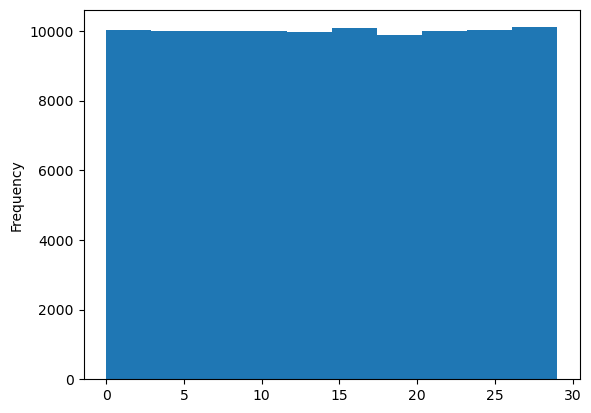

In [55]:
df['Overtime_Hours'].plot(kind = 'hist')

<Axes: >

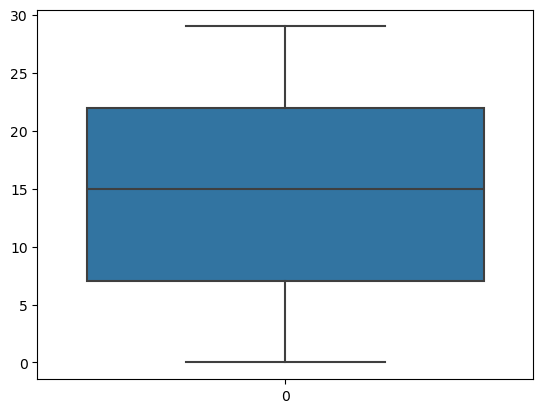

In [56]:
sns.boxplot(df['Overtime_Hours'])

In [57]:
df.head(5)

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


In [58]:
df['Sick_Days'].isnull().sum()

0

<Axes: >

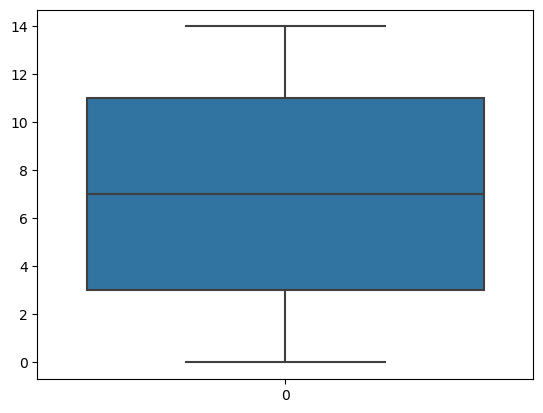

In [59]:
sns.boxplot(df['Sick_Days'])

In [60]:
df['Sick_Days'].skew()

-0.0033204033775700546

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


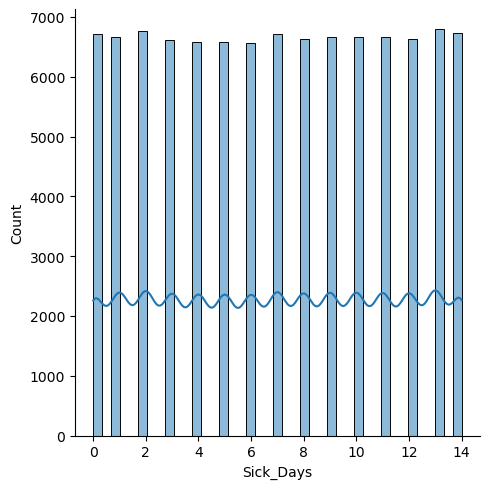

In [61]:
sns.displot(kind = 'hist' , data = df , x = 'Sick_Days' , kde=True)

In [62]:
df['Remote_Work_Frequency'].skew()

-0.0019009721887309542

In [63]:
df['Remote_Work_Frequency'].isnull().sum()

0

In [64]:
df['Remote_Work_Frequency'].value_counts()

Remote_Work_Frequency
25     20235
75     20173
100    20049
0      19837
50     19706
Name: count, dtype: int64

In [65]:
df['Team_Size'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Team_Size
Non-Null Count   Dtype
--------------   -----
100000 non-null  int64
dtypes: int64(1)
memory usage: 781.4 KB


In [66]:
df['Team_Size'].skew()

-0.0005922444743663084

In [67]:
df['Team_Size'].isnull().sum()

0

In [68]:
df['Team_Size'].value_counts()

Team_Size
19    5468
16    5356
18    5324
11    5323
4     5309
3     5298
1     5287
5     5279
2     5272
10    5251
12    5244
8     5242
13    5233
7     5218
15    5214
14    5210
6     5164
9     5159
17    5149
Name: count, dtype: int64

In [69]:
df["Training_Hours"].isnull().sum()

0

In [70]:
df["Training_Hours"].describe()

count    100000.000000
mean         49.506060
std          28.890383
min           0.000000
25%          25.000000
50%          49.000000
75%          75.000000
max          99.000000
Name: Training_Hours, dtype: float64

<Axes: >

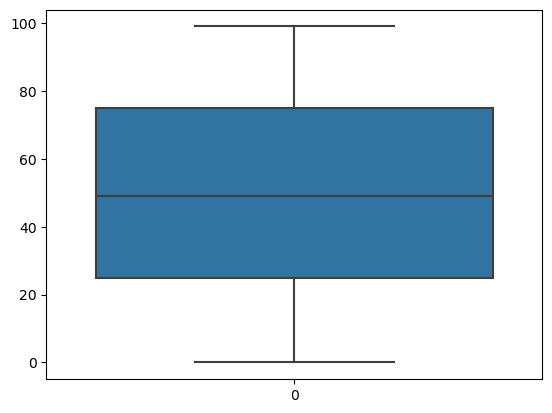

In [71]:
sns.boxplot(df["Training_Hours"])

In [72]:
df["Training_Hours"].skew()

-0.0006484906392317161

In [73]:
df["Training_Hours"].value_counts()

Training_Hours
26    1098
93    1076
40    1065
45    1063
28    1063
      ... 
64     936
19     935
23     932
99     921
25     914
Name: count, Length: 100, dtype: int64

In [74]:
df['Promotions'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Promotions
Non-Null Count   Dtype
--------------   -----
100000 non-null  int64
dtypes: int64(1)
memory usage: 781.4 KB


In [75]:
df['Promotions'].value_counts()

Promotions
1    33436
0    33296
2    33268
Name: count, dtype: int64

In [76]:
df['Promotions'] = df['Promotions'].astype('category')

In [77]:
df['Employee_Satisfaction_Score'].isnull().sum()

0

In [78]:
df['Employee_Satisfaction_Score'].skew()

0.0013210585126319212

In [79]:
df['Employee_Satisfaction_Score'].value_counts()

Employee_Satisfaction_Score
2.32    302
2.37    298
2.90    292
2.13    291
2.87    290
       ... 
1.39    213
4.53    209
1.41    204
1.00    143
5.00    105
Name: count, Length: 401, dtype: int64

<Axes: >

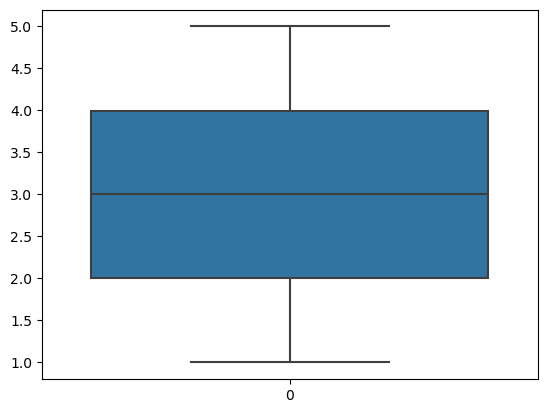

In [80]:
sns.boxplot(df['Employee_Satisfaction_Score'])

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   Employee_ID                  100000 non-null  int64   
 1   Department                   100000 non-null  object  
 2   Gender                       100000 non-null  object  
 3   Age                          100000 non-null  int64   
 4   Job_Title                    100000 non-null  object  
 5   Hire_Date                    100000 non-null  object  
 6   Years_At_Company             100000 non-null  int64   
 7   Education_Level              100000 non-null  object  
 8   Performance_Score            100000 non-null  int64   
 9   Monthly_Salary               100000 non-null  float64 
 10  Work_Hours_Per_Week          100000 non-null  int64   
 11  Projects_Handled             100000 non-null  int64   
 12  Overtime_Hours               100000 non-null 

In [82]:
df['Hire_Date'] = pd.to_datetime(df['Hire_Date'])

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Employee_ID                  100000 non-null  int64         
 1   Department                   100000 non-null  object        
 2   Gender                       100000 non-null  object        
 3   Age                          100000 non-null  int64         
 4   Job_Title                    100000 non-null  object        
 5   Hire_Date                    100000 non-null  datetime64[ns]
 6   Years_At_Company             100000 non-null  int64         
 7   Education_Level              100000 non-null  object        
 8   Performance_Score            100000 non-null  int64         
 9   Monthly_Salary               100000 non-null  float64       
 10  Work_Hours_Per_Week          100000 non-null  int64         
 11  Projects_Handled           

<Axes: ylabel='count'>

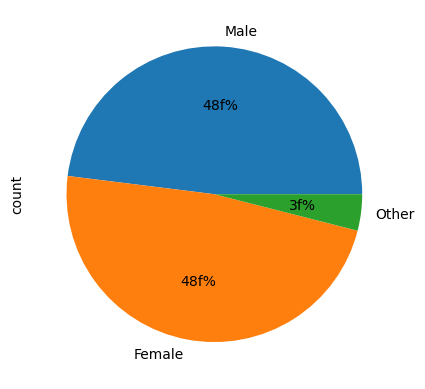

In [84]:
df['Gender'].value_counts().plot(kind = 'pie' , autopct = '%0.1if%%')

In [85]:
df.sample(5)

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
67140,67141,Operations,Male,43,Manager,2021-07-04 08:03:05.556036,3,Bachelor,2,7200.0,46,5,24,9,0,13,67,2,2.66,False
77695,77696,Engineering,Male,43,Engineer,2020-01-19 08:03:05.556036,4,Bachelor,4,8400.0,50,34,24,5,50,8,43,2,3.99,True
75502,75503,Operations,Female,48,Manager,2024-03-17 08:03:05.556036,0,High School,5,9000.0,60,43,3,9,100,6,67,1,1.92,False
34093,34094,IT,Female,56,Developer,2021-06-29 08:03:05.556036,3,Bachelor,3,6500.0,35,42,14,7,0,18,38,0,4.48,False
55020,55021,Customer Support,Male,48,Developer,2021-03-28 08:03:05.556036,3,High School,5,7500.0,53,40,7,1,100,7,70,1,1.60,False


<Axes: ylabel='count'>

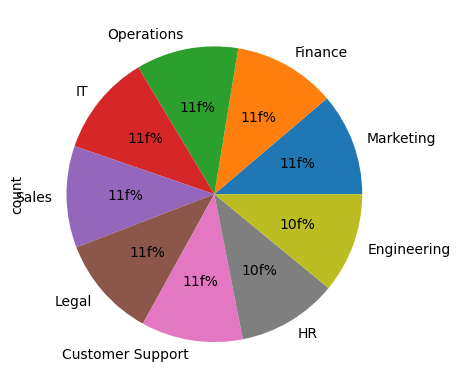

In [86]:
df['Department'].value_counts().plot(kind = 'pie' , autopct = '%0.1if%%')

<Axes: ylabel='count'>

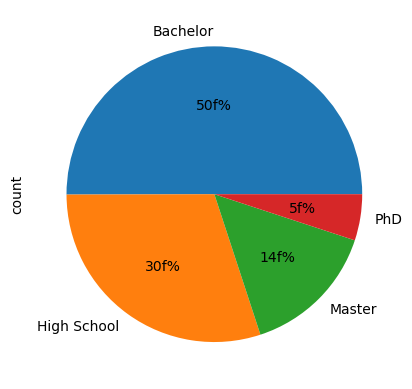

In [87]:
df['Education_Level'].value_counts().plot(kind = 'pie' , autopct = '%0.1if%%')

<Axes: ylabel='count'>

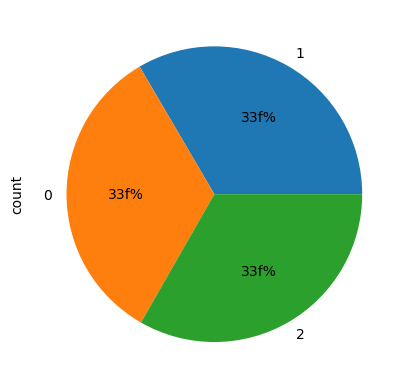

In [88]:
df['Promotions'].value_counts().plot(kind = 'pie' , autopct = '%0.1if%%')

In [89]:
df.columns

Index(['Employee_ID', 'Department', 'Gender', 'Age', 'Job_Title', 'Hire_Date',
       'Years_At_Company', 'Education_Level', 'Performance_Score',
       'Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled',
       'Overtime_Hours', 'Sick_Days', 'Remote_Work_Frequency', 'Team_Size',
       'Training_Hours', 'Promotions', 'Employee_Satisfaction_Score',
       'Resigned'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

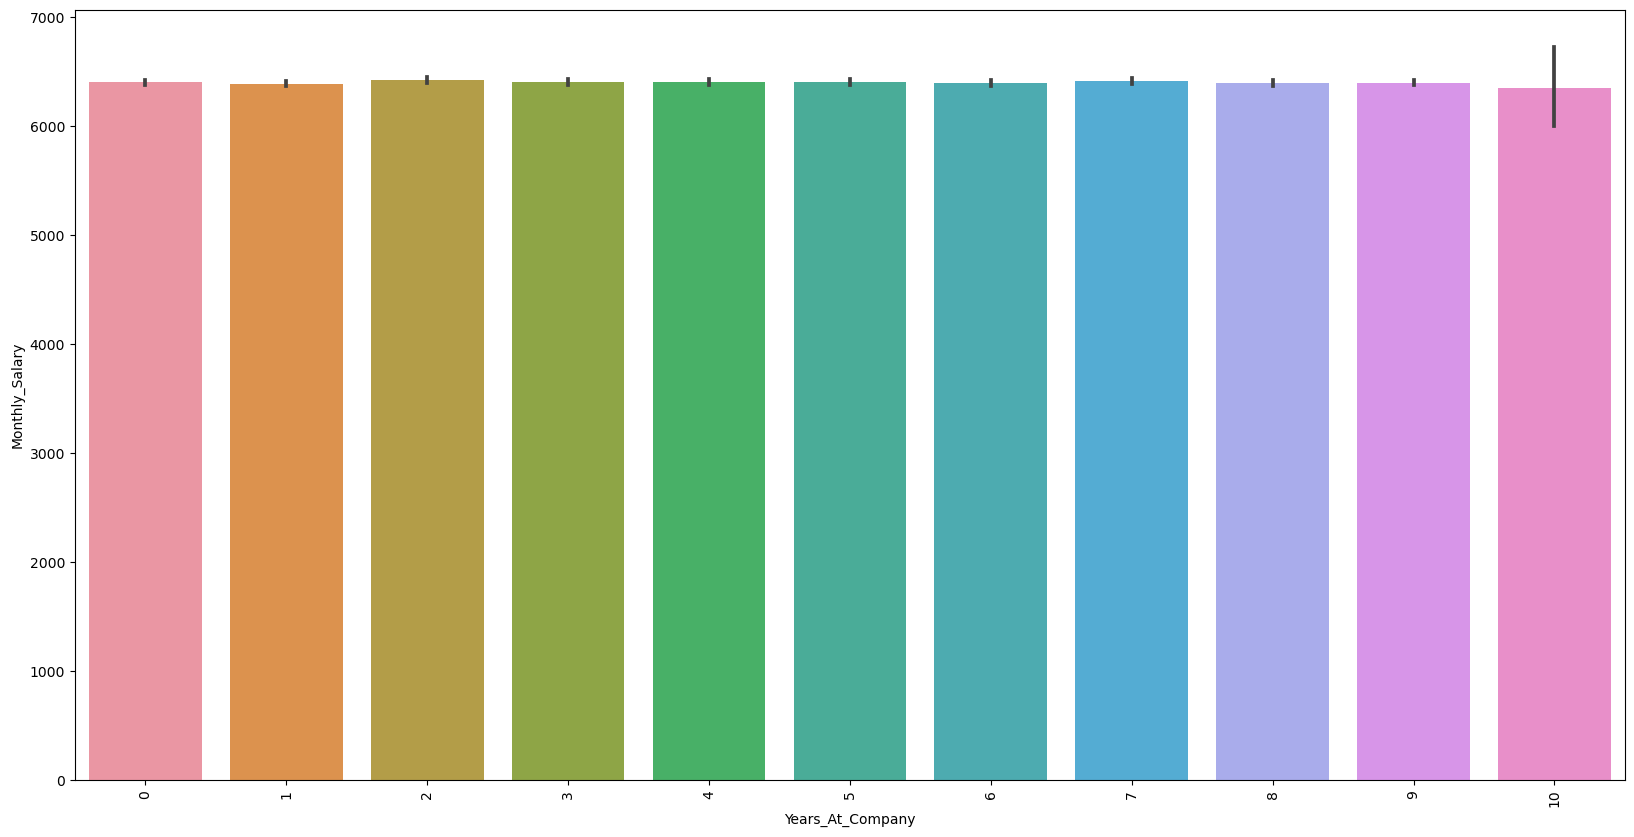

In [90]:
plt.figure(figsize=(20,10))
sns.barplot(data=df,x='Years_At_Company',y='Monthly_Salary')
plt.xticks(rotation='vertical')

#feature_selection

In [91]:
df.columns

Index(['Employee_ID', 'Department', 'Gender', 'Age', 'Job_Title', 'Hire_Date',
       'Years_At_Company', 'Education_Level', 'Performance_Score',
       'Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled',
       'Overtime_Hours', 'Sick_Days', 'Remote_Work_Frequency', 'Team_Size',
       'Training_Hours', 'Promotions', 'Employee_Satisfaction_Score',
       'Resigned'],
      dtype='object')

In [92]:
df = df.drop('Employee_ID', axis=1)

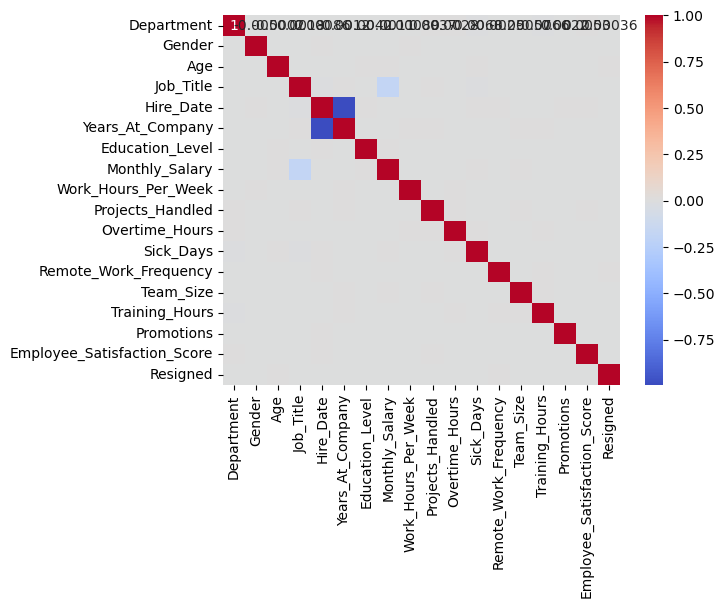

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load your dataset
df = pd.read_csv('C:\\Users\\DEEL\\Downloads\\employeePerformance.csv')

# Encode categorical variables
label_encoder = LabelEncoder()
df['Department'] = label_encoder.fit_transform(df['Department'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Job_Title'] = label_encoder.fit_transform(df['Job_Title'])
df['Hire_Date'] = label_encoder.fit_transform(df['Hire_Date'])
df['Years_At_Company'] = label_encoder.fit_transform(df['Years_At_Company'])
df['Education_Level'] = label_encoder.fit_transform(df['Education_Level'])
df['Monthly_Salary'] = label_encoder.fit_transform(df['Monthly_Salary'])
df['Work_Hours_Per_Week'] = label_encoder.fit_transform(df['Work_Hours_Per_Week'])
df['Projects_Handled'] = label_encoder.fit_transform(df['Projects_Handled'])
df['Overtime_Hours'] = label_encoder.fit_transform(df['Overtime_Hours'])
df['Sick_Days'] = label_encoder.fit_transform(df['Sick_Days'])
df['Remote_Work_Frequency'] = label_encoder.fit_transform(df['Remote_Work_Frequency'])
df['Team_Size'] = label_encoder.fit_transform(df['Team_Size'])
df['Training_Hours'] = label_encoder.fit_transform(df['Training_Hours'])
df['Promotions'] = label_encoder.fit_transform(df['Promotions'])
df['Employee_Satisfaction_Score'] = label_encoder.fit_transform(df['Employee_Satisfaction_Score'])
df['Resigned'] = label_encoder.fit_transform(df['Resigned'])
# Select features for correlation matrix
X = df[['Department', 'Gender', 'Age', 'Job_Title', 'Hire_Date',
       'Years_At_Company', 'Education_Level', 
       'Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled',
       'Overtime_Hours', 'Sick_Days', 'Remote_Work_Frequency', 'Team_Size',
       'Training_Hours', 'Promotions', 'Employee_Satisfaction_Score',
       'Resigned']]

# Compute correlation matrix
corr_matrix = X.corr()

# Visualize correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()


In [94]:
# Define the independent variables (add a constant for the intercept)
X = df[['Department', 'Gender', 'Age', 'Job_Title', 'Hire_Date',
       'Years_At_Company', 'Education_Level','Performance_Score',
       'Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled',
       'Overtime_Hours', 'Sick_Days', 'Remote_Work_Frequency', 'Team_Size',
       'Training_Hours', 'Promotions', 'Employee_Satisfaction_Score',
       'Resigned']]
X = sm.add_constant(X)

# Define the dependent variable
y = df['Performance_Score']

# Fit the model using the independent and dependent variables
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Performance_Score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.983e+31
Date:                Thu, 05 Dec 2024   Prob (F-statistic):               0.00
Time:                        14:01:01   Log-Likelihood:             2.9982e+06
No. Observations:              100000   AIC:                        -5.996e+06
Df Residuals:                   99980   BIC:                        -5.996e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [104]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (80000, 10)
Testing set shape: (20000, 10)


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Define features (X) and target (y)
X = df[['Department',  'Age', 'Job_Title', 'Hire_Date',
       'Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled',
       'Overtime_Hours', 'Team_Size',
       'Training_Hours', 'Employee_Satisfaction_Score']]  # Replace with selected features
y = df['Performance_Score']  # Replace with your target variable

# Scale numerical features (optional but recommended for regression models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (80000, 11)
Testing set shape: (20000, 11)


In [99]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Retrieve coefficients
coefficients = lr_model.coef_
intercept = lr_model.intercept_

print("Intercept:", intercept)
print("Coefficients:", coefficients)

# Map coefficients to features
features = ['Department',  'Age', 'Job_Title', 'Hire_Date',
       'Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled',
       'Overtime_Hours', 'Team_Size',
       'Training_Hours', 'Employee_Satisfaction_Score']
for feature, coef in zip(features, coefficients):
    print(f"{feature}: {coef:.4f}")


Intercept: 2.9977224946801964
Coefficients: [-1.90625866e-03 -1.89608240e-04  1.25585593e-01 -1.61186641e-03
  6.85500913e-01 -5.24283080e-03  3.23698968e-05 -3.09587640e-04
 -9.51840954e-03  6.14536274e-03  3.76445232e-04]
Department: -0.0019
Age: -0.0002
Job_Title: 0.1256
Hire_Date: -0.0016
Monthly_Salary: 0.6855
Work_Hours_Per_Week: -0.0052
Projects_Handled: 0.0000
Overtime_Hours: -0.0003
Team_Size: -0.0095
Training_Hours: 0.0061
Employee_Satisfaction_Score: 0.0004


In [100]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Output the RMSE
print("Root Mean Squared Error (RMSE):", rmse)


R-squared: 0.23510361878803765
Mean Squared Error: 1.5336026807028862
Mean Absolute Error: 1.03505124942147
Root Mean Squared Error (RMSE): 1.2383871287698716


In [101]:
r2

0.23510361878803765

In [102]:
import numpy as np

# Cost function (Mean Squared Error)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)  # Predictions: X * theta
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

# Gradient Descent Algorithm
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    
    for i in range(iterations):
        predictions = X.dot(theta)
        theta = theta - (alpha / m) * (X.T.dot(predictions - y))  # Update rule
        
    return theta

# Assuming df is your DataFrame and 'Performance_Score' is the target variable
# Example: Use appropriate features for your problem
X = df[[  'Age', 'Job_Title', 'Hire_Date',
       'Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled',
       'Overtime_Hours', 'Team_Size',
       'Training_Hours', 'Employee_Satisfaction_Score']].values  # Feature matrix
y = df['Performance_Score'].values  # Target vector

# Normalize/Scale features (optional but recommended for gradient descent)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scale features (important for gradient descent)
X_scaled = scaler.fit_transform(X)

# Add a column of ones to X for the intercept (bias term)
X_scaled = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

# Initialize theta (parameters) as zeros
theta = np.zeros(X_scaled.shape[1])

# Set hyperparameters
alpha = 0.01  # Learning rate
iterations = 1000  # Number of iterations

# Train the model using gradient descent
theta_final = gradient_descent(X_scaled, y, theta, alpha, iterations)

# Output the final optimized theta (model parameters)
print("Optimized Theta:", theta_final)


Optimized Theta: [ 2.99530068e+00 -3.38746501e-04  1.26342413e-01 -2.10768145e-03
  6.87608966e-01 -6.56163798e-03  1.90973555e-03  5.36259282e-04
 -9.72250361e-03  4.24894771e-03  1.68697757e-03]


R-squared: 0.2285917627297337
Mean Squared Error: 1.5439189057006801
Mean Absolute Error: 1.0386773585589184
Root Mean Squared Error (RMSE): 1.2425453334589769


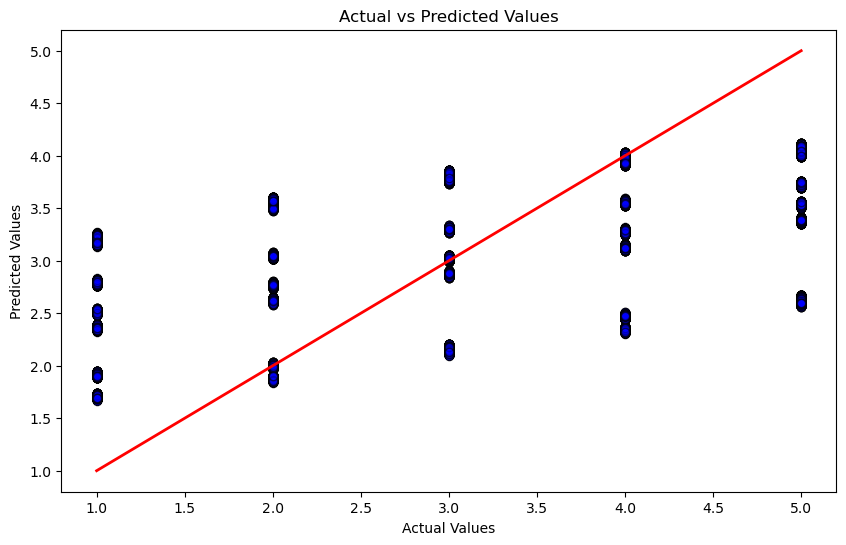

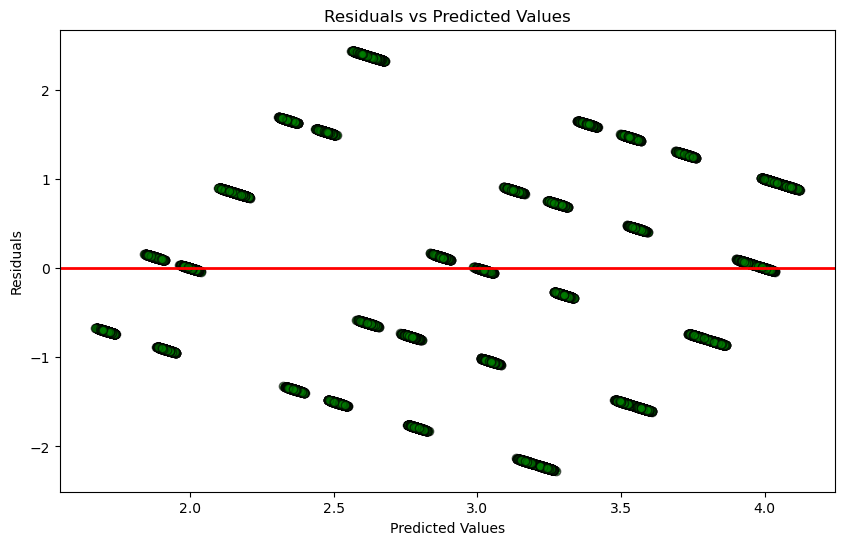

In [103]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = X_scaled.dot(theta_final)  # Predictions using the trained model

# Evaluate the model performance

# R-squared (coefficient of determination)
r2 = r2_score(y, y_pred)
print("R-squared:", r2)

# Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y, y_pred)
print("Mean Absolute Error:", mae)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Output the RMSE
print("Root Mean Squared Error (RMSE):", rmse)


# Plot the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='blue', alpha=0.6, edgecolors='k')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linewidth=2)  # Line of perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# Optionally, plot the residuals (error between actual and predicted values)
residuals = y - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green', alpha=0.6, edgecolors='k')
plt.axhline(y=0, color='red', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


In [104]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Cost function (Mean Squared Error)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)  # Predictions: X * theta
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

# Stochastic Gradient Descent Algorithm
def stochastic_gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    
    for i in range(iterations):
        # Shuffle the dataset at the start of each epoch
        for j in range(m):
            # Randomly select a single data point
            rand_index = np.random.randint(m)
            X_i = X[rand_index:rand_index+1]
            y_i = y[rand_index:rand_index+1]
            
            # Make prediction for the selected data point
            prediction = X_i.dot(theta)
            
            # Update theta (gradient update rule for a single data point)
            theta = theta - (alpha * X_i.T.dot(prediction - y_i))
        
        # Optionally, print the cost at every 100th iteration to monitor progress
        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {compute_cost(X, y, theta)}")
    
    return theta

# Assuming df is your DataFrame and 'Performance_Score' is the target variable
# Example: Use appropriate features for your problem
X= df[['Age', 'Job_Title', 'Hire_Date', 'Monthly_Salary', 'Work_Hours_Per_Week', 
        'Projects_Handled', 'Overtime_Hours', 'Team_Size', 'Training_Hours', 
        'Employee_Satisction_Score']].values  # Feature matrix
y = df['Performance_Score'].values  # Target vector

# Normalize/Scale features (optional but recommended for gradient descent)
scaler = StandardScaler()

# Scale features (important for gradient descent)
X_scaled = scaler.fit_transform(X)

# Add a column of ones to X for the intercept (bias term)
X_scaled = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

# Initialize theta (parameters) as zeros
theta = np.zeros(X_scaled.shape[1])

# Set hyperparameters
alpha = 0.01  # Learning rate
iterations = 1000  # Number of iterations

# Train the model using stochastic gradient descent
theta_final = stochastic_gradient_descent(X_scaled, y, theta, alpha, iterations)

# Output the final optimized theta (model parameters)
print("Optimized Theta:", theta_final)


Iteration 0, Cost: 0.7996286650569671
Iteration 100, Cost: 0.8129096199720784
Iteration 200, Cost: 0.7987628891255635
Iteration 300, Cost: 0.8158227294034273
Iteration 400, Cost: 0.8348402589593364
Iteration 500, Cost: 0.7893434321083267
Iteration 600, Cost: 0.8328644998233342
Iteration 700, Cost: 0.8504042594204659
Iteration 800, Cost: 0.7993771393060582
Iteration 900, Cost: 0.8125730190447128
Optimized Theta: [ 2.92227868 -0.04305203 -0.07352253  0.12590636  0.6914839   0.01658713
 -0.08671528 -0.13251061  0.04682252  0.19201732 -0.08765365]


In [108]:
df.columns

Index(['Employee_ID', 'Department', 'Gender', 'Age', 'Job_Title', 'Hire_Date',
       'Years_At_Company', 'Education_Level', 'Performance_Score',
       'Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled',
       'Overtime_Hours', 'Sick_Days', 'Remote_Work_Frequency', 'Team_Size',
       'Training_Hours', 'Promotions', 'Employee_Satisfaction_Score',
       'Resigned'],
      dtype='object')

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = X_scaled.dot(theta_final)  # Predictions using the trained model

# Evaluate the model performance

# R-squared (coefficient of determination)
r2 = r2_score(y, y_pred)
print("R-squared:", r2)

# Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y, y_pred)
print("Mean Absolute Error:", mae)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Output the RMSE
print("Root Mean Squared Error (RMSE):", rmse)

Optimized Theta: [ 2.99785807e+00 -1.87812589e-04  1.25587321e-01 -1.61301551e-03
  6.85424560e-01 -5.24858380e-03  2.49823182e-05 -3.13693577e-04
 -9.51389343e-03  6.15365254e-03  3.67390488e-04]
Training Mean Squared Error (MSE): 1.5465
Training Root Mean Squared Error (RMSE): 1.2436
Training R^2 Value: 0.2269
Test Mean Squared Error (MSE): 1.5336
Test Root Mean Squared Error (RMSE): 1.2384
Test R^2 Value: 0.2351


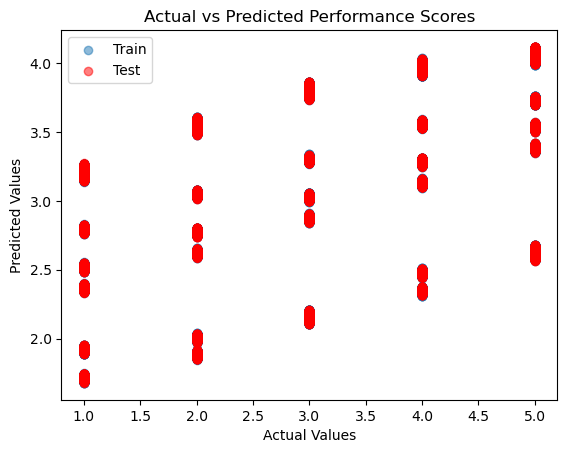

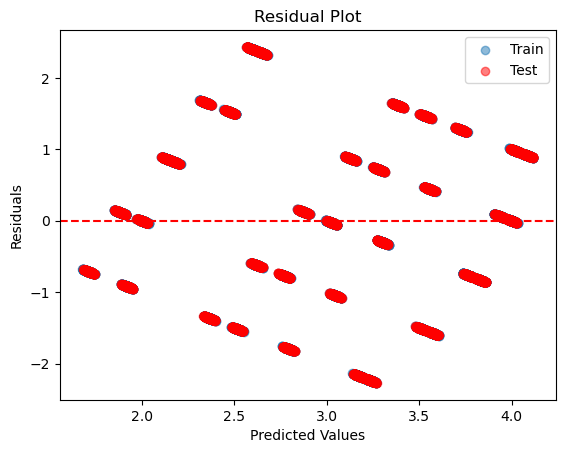

In [109]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = df  # Assuming 'df' is already loaded as your DataFrame

# Step 2: Define the feature matrix (X) and target vector (y)
X = df[['Age', 'Job_Title', 'Hire_Date', 'Monthly_Salary', 'Work_Hours_Per_Week', 
        'Projects_Handled', 'Overtime_Hours', 'Team_Size', 'Training_Hours', 
        'Employee_Satisfaction_Score']].values  # Corrected column name
y = df['Performance_Score'].values

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Normalize/scale the features (important for gradient descent)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a column of ones to X for the intercept (bias term)
X_train_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

# Step 5: Define the cost function and gradient descent
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)  # Predictions: X * theta
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    for i in range(iterations):
        predictions = X.dot(theta)
        theta = theta - (alpha / m) * (X.T.dot(predictions - y))  # Update rule
    return theta

# Step 6: Initialize parameters and train the model
theta = np.zeros(X_train_scaled.shape[1])  # Initialize theta
alpha = 0.01  # Learning rate
iterations = 1000  # Number of iterations

theta_final = gradient_descent(X_train_scaled, y_train, theta, alpha, iterations)

print("Optimized Theta:", theta_final)

# Step 7: Evaluate the model
# Predictions on training data
y_train_pred = X_train_scaled.dot(theta_final)

# Mean Squared Error (MSE)
mse_train = np.mean((y_train_pred - y_train) ** 2)
print(f"Training Mean Squared Error (MSE): {mse_train:.4f}")

# Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)
print(f"Training Root Mean Squared Error (RMSE): {rmse_train:.4f}")

# Coefficient of Determination (R^2)
ss_total_train = np.sum((y_train - np.mean(y_train)) ** 2)
ss_residual_train = np.sum((y_train - y_train_pred) ** 2)
r2_train = 1 - (ss_residual_train / ss_total_train)
print(f"Training R^2 Value: {r2_train:.4f}")

# Evaluate on test data
y_test_pred = X_test_scaled.dot(theta_final)

mse_test = np.mean((y_test_pred - y_test) ** 2)
rmse_test = np.sqrt(mse_test)
ss_total_test = np.sum((y_test - np.mean(y_test)) ** 2)
ss_residual_test = np.sum((y_test - y_test_pred) ** 2)
r2_test = 1 - (ss_residual_test / ss_total_test)

print(f"Test Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Test Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"Test R^2 Value: {r2_test:.4f}")

# Step 8: Visualize results
# Actual vs Predicted values for training data
plt.scatter(y_train, y_train_pred, alpha=0.5, label="Train")
plt.scatter(y_test, y_test_pred, alpha=0.5, label="Test", color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Performance Scores")
plt.legend()
plt.show()

# Residual plot
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

plt.scatter(y_train_pred, train_residuals, alpha=0.5, label="Train")
plt.scatter(y_test_pred, test_residuals, alpha=0.5, label="Test", color='red')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.legend()
plt.show()


In [105]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [106]:
X=  df[['Age', 'Job_Title', 'Hire_Date', 'Monthly_Salary', 'Work_Hours_Per_Week', 
        'Projects_Handled', 'Overtime_Hours', 'Team_Size', 'Training_Hours', 
        'Employee_Satisfaction_Score']].values  # Feature matrix]].values  # Feature matrix
y = df['Performance_Score'].values

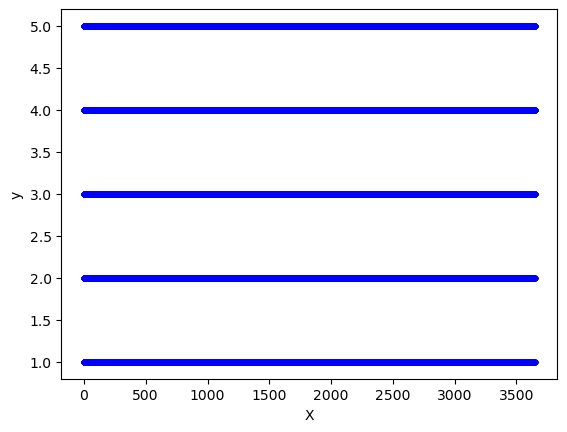

In [107]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [103]:
df.columns

Index(['Employee_ID', 'Department', 'Gender', 'Age', 'Job_Title', 'Hire_Date',
       'Years_At_Company', 'Education_Level', 'Performance_Score',
       'Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled',
       'Overtime_Hours', 'Sick_Days', 'Remote_Work_Frequency', 'Team_Size',
       'Training_Hours', 'Promotions', 'Employee_Satisfaction_Score',
       'Resigned'],
      dtype='object')

In [108]:
# Applying Polynomial Linear Regression
# degree 2
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)


In [109]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [110]:
y_pred = lr.predict(X_test_trans)

In [111]:
r2_score(y_test,y_pred)

0.6557998494232073

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


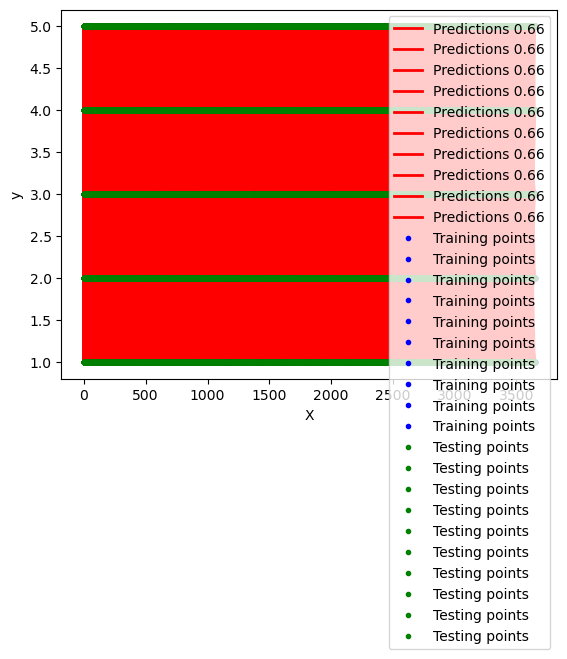

In [114]:
poly = PolynomialFeatures(degree=2)
X=  df[['Age', 'Job_Title', 'Hire_Date', 'Monthly_Salary', 'Work_Hours_Per_Week', 
        'Projects_Handled', 'Overtime_Hours', 'Team_Size', 'Training_Hours', 
        'Employee_Satisfaction_Score']].values  # Feature matrix]].values  # Feature matrix
y = df['Performance_Score'].values

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_trans,y_train)



plt.plot(X, y, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [115]:
r2_score(y_test,y_pred)

0.6557998494232073